# Antisymmetric Weights Comparison

Comparison of different h values (1 and 0.1) for ResAntiSymNets with given backprop learning rates of 0.1, 0.5 and 1. The stability with regard to the depth of the net is considered. For stable archtitectures a maximum depth of 120 layers is considered.
The hidden layers have 8 neurons, gamma is set to 0.3 and the net is trained for 100 epochs. The results are averaged over 10 computations.

In [1]:
import torch
from Dataset.Dataset import makeMoonsDataset

dataset_size = 600
batch_size = 40
test_set_size = dataset_size * 0.2

train_loader, test_loader = makeMoonsDataset(dataset_size, batch_size)

## Learning rate 0.1

### h = 1

In [3]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
gamma = 0.3
h = 1
lr = 0.1

max_layers = 40
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'AntiSym_Comparison_results//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9474999904632568
Max test accuracy: 0.9450000000000001
Time elapsed: 12.789678981999941
Number of layers: 3
Max training accuracy: 0.9856249928474426
Max test accuracy: 0.9791666666666666
Time elapsed: 16.46214900300015
Number of layers: 4
Max training accuracy: 0.9989583313465118
Max test accuracy: 0.9966666666666666
Time elapsed: 22.298688333999962
Number of layers: 5
Max training accuracy: 0.9989583313465118
Max test accuracy: 0.9975
Time elapsed: 25.69672525599981
Number of layers: 6
Max training accuracy: 1.0
Max test accuracy: 1.0
Time elapsed: 28.811471888000142
Number of layers: 7
Max training accuracy: 0.9904166638851166
Max test accuracy: 0.9891666666666666
Time elapsed: 33.66371358399988
Number of layers: 8
Max training accuracy: 1.0
Max test accuracy: 0.9991666666666668
Time elapsed: 37.99518894700009
Number of layers: 9
Max training accuracy: 1.0
Max test accuracy: 0.9983333333333333
Time elapsed: 44.13530271700006
Number of lay

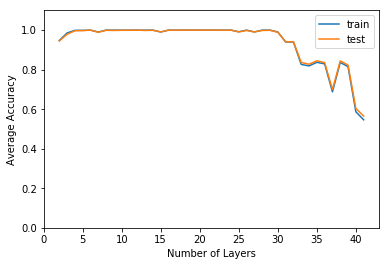

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### h =  0.1

In [2]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
gamma = 0.3
h = 0.1
lr = 0.1

max_layers = 120
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'AntiSym_Comparison_results//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.940416669845581
Max test accuracy: 0.955
Time elapsed: 11.628685269999991
Number of layers: 3
Max training accuracy: 0.9229166686534882
Max test accuracy: 0.9450000000000001
Time elapsed: 14.960609403000007
Number of layers: 4
Max training accuracy: 0.9445833265781403
Max test accuracy: 0.95
Time elapsed: 18.329642236999987
Number of layers: 5
Max training accuracy: 0.9210416734218597
Max test accuracy: 0.9283333333333333
Time elapsed: 22.024457772999995
Number of layers: 6
Max training accuracy: 0.926458328962326
Max test accuracy: 0.94
Time elapsed: 24.795526373
Number of layers: 7
Max training accuracy: 0.9287499904632568
Max test accuracy: 0.9366666666666668
Time elapsed: 29.42907770100001
Number of layers: 8
Max training accuracy: 0.9362499952316284
Max test accuracy: 0.94
Time elapsed: 33.696739648999994
Number of layers: 9
Max training accuracy: 0.9208333313465118
Max test accuracy: 0.9283333333333333
Time elapsed: 38.653537838999995


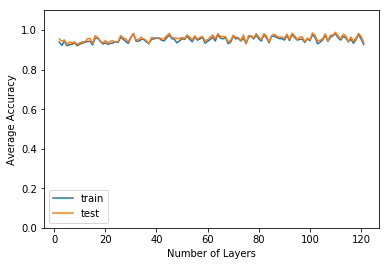

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

## Learning rate 0.5

### h = 1

In [6]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
gamma = 0.3
h = 1
lr = 0.5

max_layers = 20
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'AntiSym_Comparison_results//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        del net
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9662499904632569
Max test accuracy: 0.9600000000000001
Time elapsed: 12.112743869000042
Number of layers: 3
Max training accuracy: 0.9985416471958161
Max test accuracy: 0.9975
Time elapsed: 16.315213189000133
Number of layers: 4
Max training accuracy: 0.9985416531562805
Max test accuracy: 0.9975
Time elapsed: 20.84354746200006
Number of layers: 5
Max training accuracy: 0.9981249868869781
Max test accuracy: 0.9975
Time elapsed: 24.1426120849992
Number of layers: 6
Max training accuracy: 0.9983333230018616
Max test accuracy: 0.9983333333333333
Time elapsed: 30.043436734000352
Number of layers: 7
Max training accuracy: 0.9991666555404664
Max test accuracy: 0.9958333333333333
Time elapsed: 33.38494030799848
Number of layers: 8
Max training accuracy: 0.9891666531562805
Max test accuracy: 0.9875
Time elapsed: 38.8770654789987
Number of layers: 9
Max training accuracy: 0.9931249916553497
Max test accuracy: 0.9933333333333334
Time elapsed: 44.380669

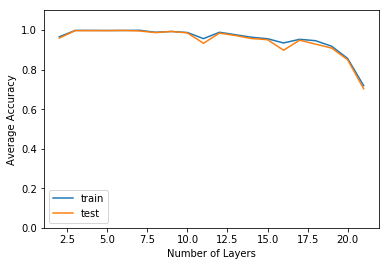

In [7]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### h = 0.1

In [3]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
gamma = 0.3
h = 0.1
lr = 0.5

max_layers = 120
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'AntiSym_Comparison_results//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9899999976158143
Max test accuracy: 0.9875
Time elapsed: 11.560841654
Number of layers: 3
Max training accuracy: 0.9804166615009308
Max test accuracy: 0.9774999999999999
Time elapsed: 15.513677497999993
Number of layers: 4
Max training accuracy: 0.9893749952316284
Max test accuracy: 0.9841666666666666
Time elapsed: 19.044559433000018
Number of layers: 5
Max training accuracy: 0.9618749976158142
Max test accuracy: 0.9516666666666667
Time elapsed: 22.928651548000005
Number of layers: 6
Max training accuracy: 0.9993749916553497
Max test accuracy: 0.9958333333333333
Time elapsed: 26.78676890899999
Number of layers: 7
Max training accuracy: 0.9714583337306977
Max test accuracy: 0.9674999999999999
Time elapsed: 29.42680865600005
Number of layers: 8
Max training accuracy: 0.9977083265781402
Max test accuracy: 0.995
Time elapsed: 32.99152629499997
Number of layers: 9
Max training accuracy: 0.998749989271164
Max test accuracy: 0.9975
Time elapsed: 36

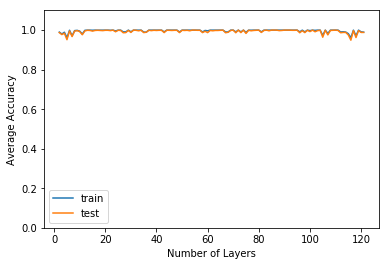

In [5]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

## Learning rate 1.0

### h = 1

In [2]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
gamma = 0.3
h = 1
lr = 1.0

max_layers = 20
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'AntiSym_Comparison_results//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        del net
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9993749916553497
Max test accuracy: 0.9991666666666668
Time elapsed: 11.913266355000815
Number of layers: 3
Max training accuracy: 0.9874999940395355
Max test accuracy: 0.985
Time elapsed: 16.18582828900071
Number of layers: 4
Max training accuracy: 0.9991666555404664
Max test accuracy: 0.9991666666666668
Time elapsed: 19.67259904799903
Number of layers: 5
Max training accuracy: 0.9845833241939544
Max test accuracy: 0.9891666666666666
Time elapsed: 23.482667047999712
Number of layers: 6
Max training accuracy: 0.9931249916553497
Max test accuracy: 0.9941666666666666
Time elapsed: 27.457997482999417
Number of layers: 7
Max training accuracy: 0.9629166603088379
Max test accuracy: 0.9600000000000001
Time elapsed: 31.615032961999532
Number of layers: 8
Max training accuracy: 0.9752083241939544
Max test accuracy: 0.9791666666666666
Time elapsed: 36.841819204000785
Number of layers: 9
Max training accuracy: 0.9118749976158143
Max test accuracy: 0.9

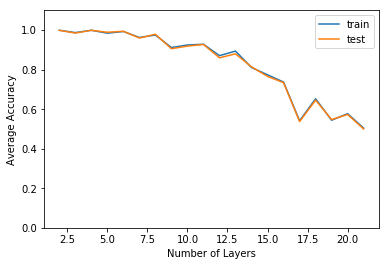

In [4]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')

### h = 0.1

In [5]:
from Networks.ResNet import ResAntiSymNet
import numpy as np
import timeit

num_epochs = 100
num_features = 2
num_classes = 2
size_hidden = 8
gamma = 0.3
h = 0.1
lr = 1.0

max_layers = 120
train_results_per_layer = np.zeros(max_layers)
test_results_per_layer = np.zeros(max_layers)
basic_save_key = 'AntiSym_Comparison_results//AntiSymNet'

for num_hidden_layers in range(1,max_layers+1):
    tic = timeit.default_timer()
    num_layers = num_hidden_layers + 1
    print('Number of layers: '+str(num_layers))
    train_results_per_epoch = np.zeros(num_epochs)
    test_results_per_epoch = np.zeros(num_epochs)
    for i in range(10):
        net = ResAntiSymNet(features=num_features, classes=num_classes, num_layers=num_layers, gamma=gamma, h=h, bias=True, hidden_size=size_hidden)
        net.set_test_tracking(True)
        net.train(num_epochs, train_loader, test_loader, print_output=False)
        train_results_per_epoch += net.avg_correct_pred.numpy()
        test_results_per_epoch += net.test_results.numpy()
        
    train_results_per_epoch = train_results_per_epoch / 10
    test_results_per_epoch = test_results_per_epoch / 10
    train_save_key = basic_save_key+'_train_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    test_save_key = basic_save_key+'_test_per_epoch_layers_'+str(num_layers)+'_h_'+str(h)+'_lr_'+str(lr)+'.csv'
    
    np.savetxt(train_save_key, train_results_per_epoch, delimiter=',')
    np.savetxt(test_save_key, test_results_per_epoch, delimiter=',')
    
    train_results_per_layer[num_hidden_layers-1] = train_results_per_epoch.max()
    print('Max training accuracy: '+str(train_results_per_epoch.max()))
    test_results_per_layer[num_hidden_layers-1] = test_results_per_epoch.max()
    print('Max test accuracy: '+str(test_results_per_epoch.max()/test_set_size))
    
    toc = timeit.default_timer()
    print('Time elapsed: '+str(toc-tic))

train_save_key = basic_save_key+'_train_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
test_save_key = basic_save_key+'_test_per_layer_h_'+str(h)+'_lr_'+str(lr)+'.csv'
np.savetxt(train_save_key, train_results_per_layer, delimiter=',')
np.savetxt(test_save_key, test_results_per_layer, delimiter=',')

Number of layers: 2
Max training accuracy: 0.9883333265781402
Max test accuracy: 0.9866666666666667
Time elapsed: 12.166836477001198
Number of layers: 3
Max training accuracy: 0.9893749833106995
Max test accuracy: 0.9908333333333333
Time elapsed: 16.030359653999767
Number of layers: 4
Max training accuracy: 0.9895833194255829
Max test accuracy: 0.9875
Time elapsed: 19.698025818001042
Number of layers: 5
Max training accuracy: 0.9879166603088378
Max test accuracy: 0.985
Time elapsed: 23.436378328999126
Number of layers: 6
Max training accuracy: 0.9897916555404663
Max test accuracy: 0.9883333333333333
Time elapsed: 26.99687556600111
Number of layers: 7
Max training accuracy: 0.9899999976158143
Max test accuracy: 0.9883333333333333
Time elapsed: 32.47332869999809
Number of layers: 8
Max training accuracy: 0.9991666615009308
Max test accuracy: 1.0
Time elapsed: 36.93995924599949
Number of layers: 9
Max training accuracy: 0.9891666531562805
Max test accuracy: 0.9883333333333333
Time elapsed

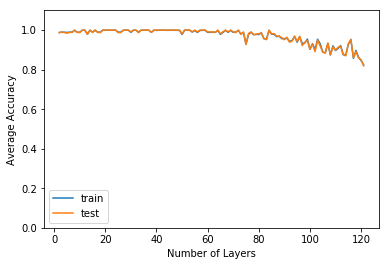

In [6]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
layers = np.arange(2,max_layers+2,1)
ax.plot(layers, train_results_per_layer, label='train')
ax.plot(layers, test_results_per_layer/test_set_size, label='test')
ax.set_ylim(0,1.1)
ax.set_xlabel('Number of Layers')
ax.set_ylabel('Average Accuracy')
ax.legend(loc='best')